In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [84]:
df = pd.read_csv('/content/winequality-red.csv')

In [85]:
x = df.iloc[:,:11]
y = df.iloc[:,-1]

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [87]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(x_train, y_train)

# Predict the labels for the test data
predictions = dtc.predict(x_test)

# Evaluate the model
dtc_accuracy = dtc.score(x_test, y_test)
print(dtc_accuracy)

0.63125


# **Accuracy Increase**

In [89]:
#SHAPE OF DATA-SET
dataset_shape = df.shape

print("Dataset shape:", dataset_shape)

Dataset shape: (1599, 12)


In [90]:
#REMOVING MISSING VALUES
original_shape = df.shape

data1 = df.dropna()
removed_values = df[~df.index.isin(data1.index)]

print("Missing values removed:")
print(removed_values)

Missing values removed:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [91]:
#from pandas.core.frame import DataFrameXchg
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

chlorides_values = df['chlorides'].values.reshape(-1, 1)  # Reshape the fare column into a 2D array

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the fare values and transform the data
chlorides1 = scaler.fit_transform(chlorides_values)

# Assign the normalized fare values back to the DataFrame
df['chlorides'] = chlorides1
print(chlorides1)
#DataFrameXchg.head()

[[0.10684474]
 [0.14357262]
 [0.13355593]
 ...
 [0.10684474]
 [0.10517529]
 [0.0918197 ]]


In [92]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.106845,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.143573,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.133556,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.105175,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.106845,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [3, 7, 12],
    'min_samples_leaf': [2, 8, 10]
}

# Step 5: Perform GridSearch to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Step 6: Train the decision tree model with the best hyperparameters
best_dt_model = grid_search.best_estimator_

# Step 7: Evaluate the model on the testing set
y_pred = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


0.646875


0.6012918307086614

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [3, 7, 12],
    'min_samples_leaf': [2, 8, 10]
}

# Step 5: Perform GridSearch to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Step 6: Train the decision tree model with the best hyperparameters
best_dt_model = grid_search.best_estimator_

# Step 7: Evaluate the model on the testing set
y_pred = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6625


In [114]:
grid_search.cv_results_

{'mean_fit_time': array([0.01113644, 0.00860305, 0.00817862, 0.00771852, 0.00745015,
        0.0080759 , 0.00806336, 0.00691967, 0.00712013, 0.0052063 ,
        0.0061708 , 0.00573206, 0.00566788, 0.00600824, 0.00572677,
        0.00531454, 0.0051867 , 0.00511298, 0.00805082, 0.00789604,
        0.00751162, 0.00740848, 0.00662613, 0.00726414, 0.00693579,
        0.00642548, 0.00669403, 0.00902834, 0.00820875, 0.00781407,
        0.00680661, 0.00692677, 0.00724416, 0.00809245, 0.0066431 ,
        0.00653   , 0.01186109, 0.01403961, 0.01560421, 0.00915151,
        0.00924058, 0.009482  , 0.01120515, 0.0091126 , 0.00860534,
        0.00694113, 0.00710182, 0.00697098, 0.00701089, 0.008639  ,
        0.00760922, 0.00708995, 0.00658755, 0.00693045, 0.01088476,
        0.01072102, 0.01043601, 0.0091629 , 0.01077523, 0.00890298,
        0.00868759, 0.00843201, 0.00846906, 0.01195278, 0.01205354,
        0.01110692, 0.00927052, 0.00957761, 0.00922089, 0.0086308 ,
        0.00875807, 0.00798583]

In [128]:
dataa = pd.DataFrame(grid_search.cv_results_)
dataa
dataa[['mean_test_score']]

,mean_test_score
0,0.563035
1,0.563835
2,0.556761
3,0.577061
4,0.575492
...,...
67,0.571531
68,0.573099
69,0.580949
70,0.581730


<ipython-input-116-bf9e052a833a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

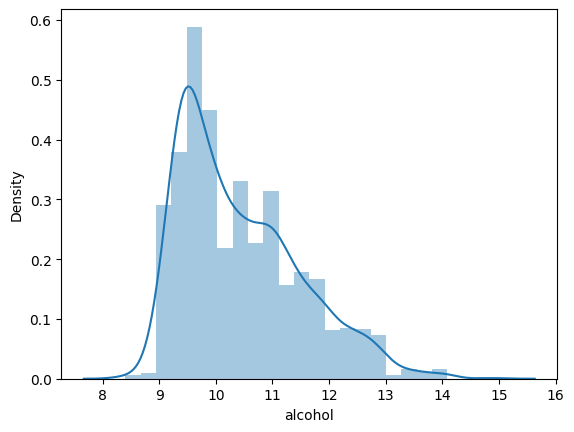

In [116]:
import seaborn as sns
sns.distplot(x.alcohol)

<ipython-input-80-167fc46dd78d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.density)


<Axes: xlabel='density', ylabel='Density'>

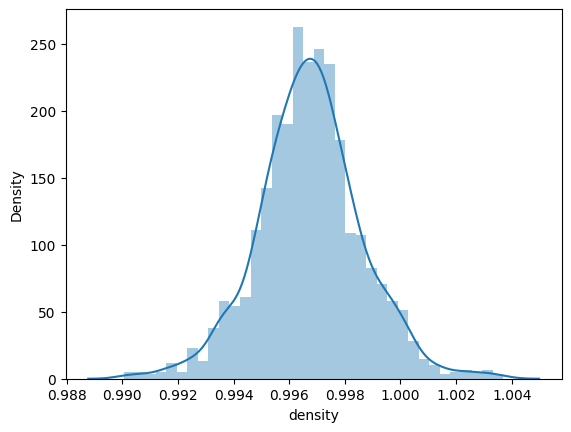

In [80]:
sns.distplot(x.density)

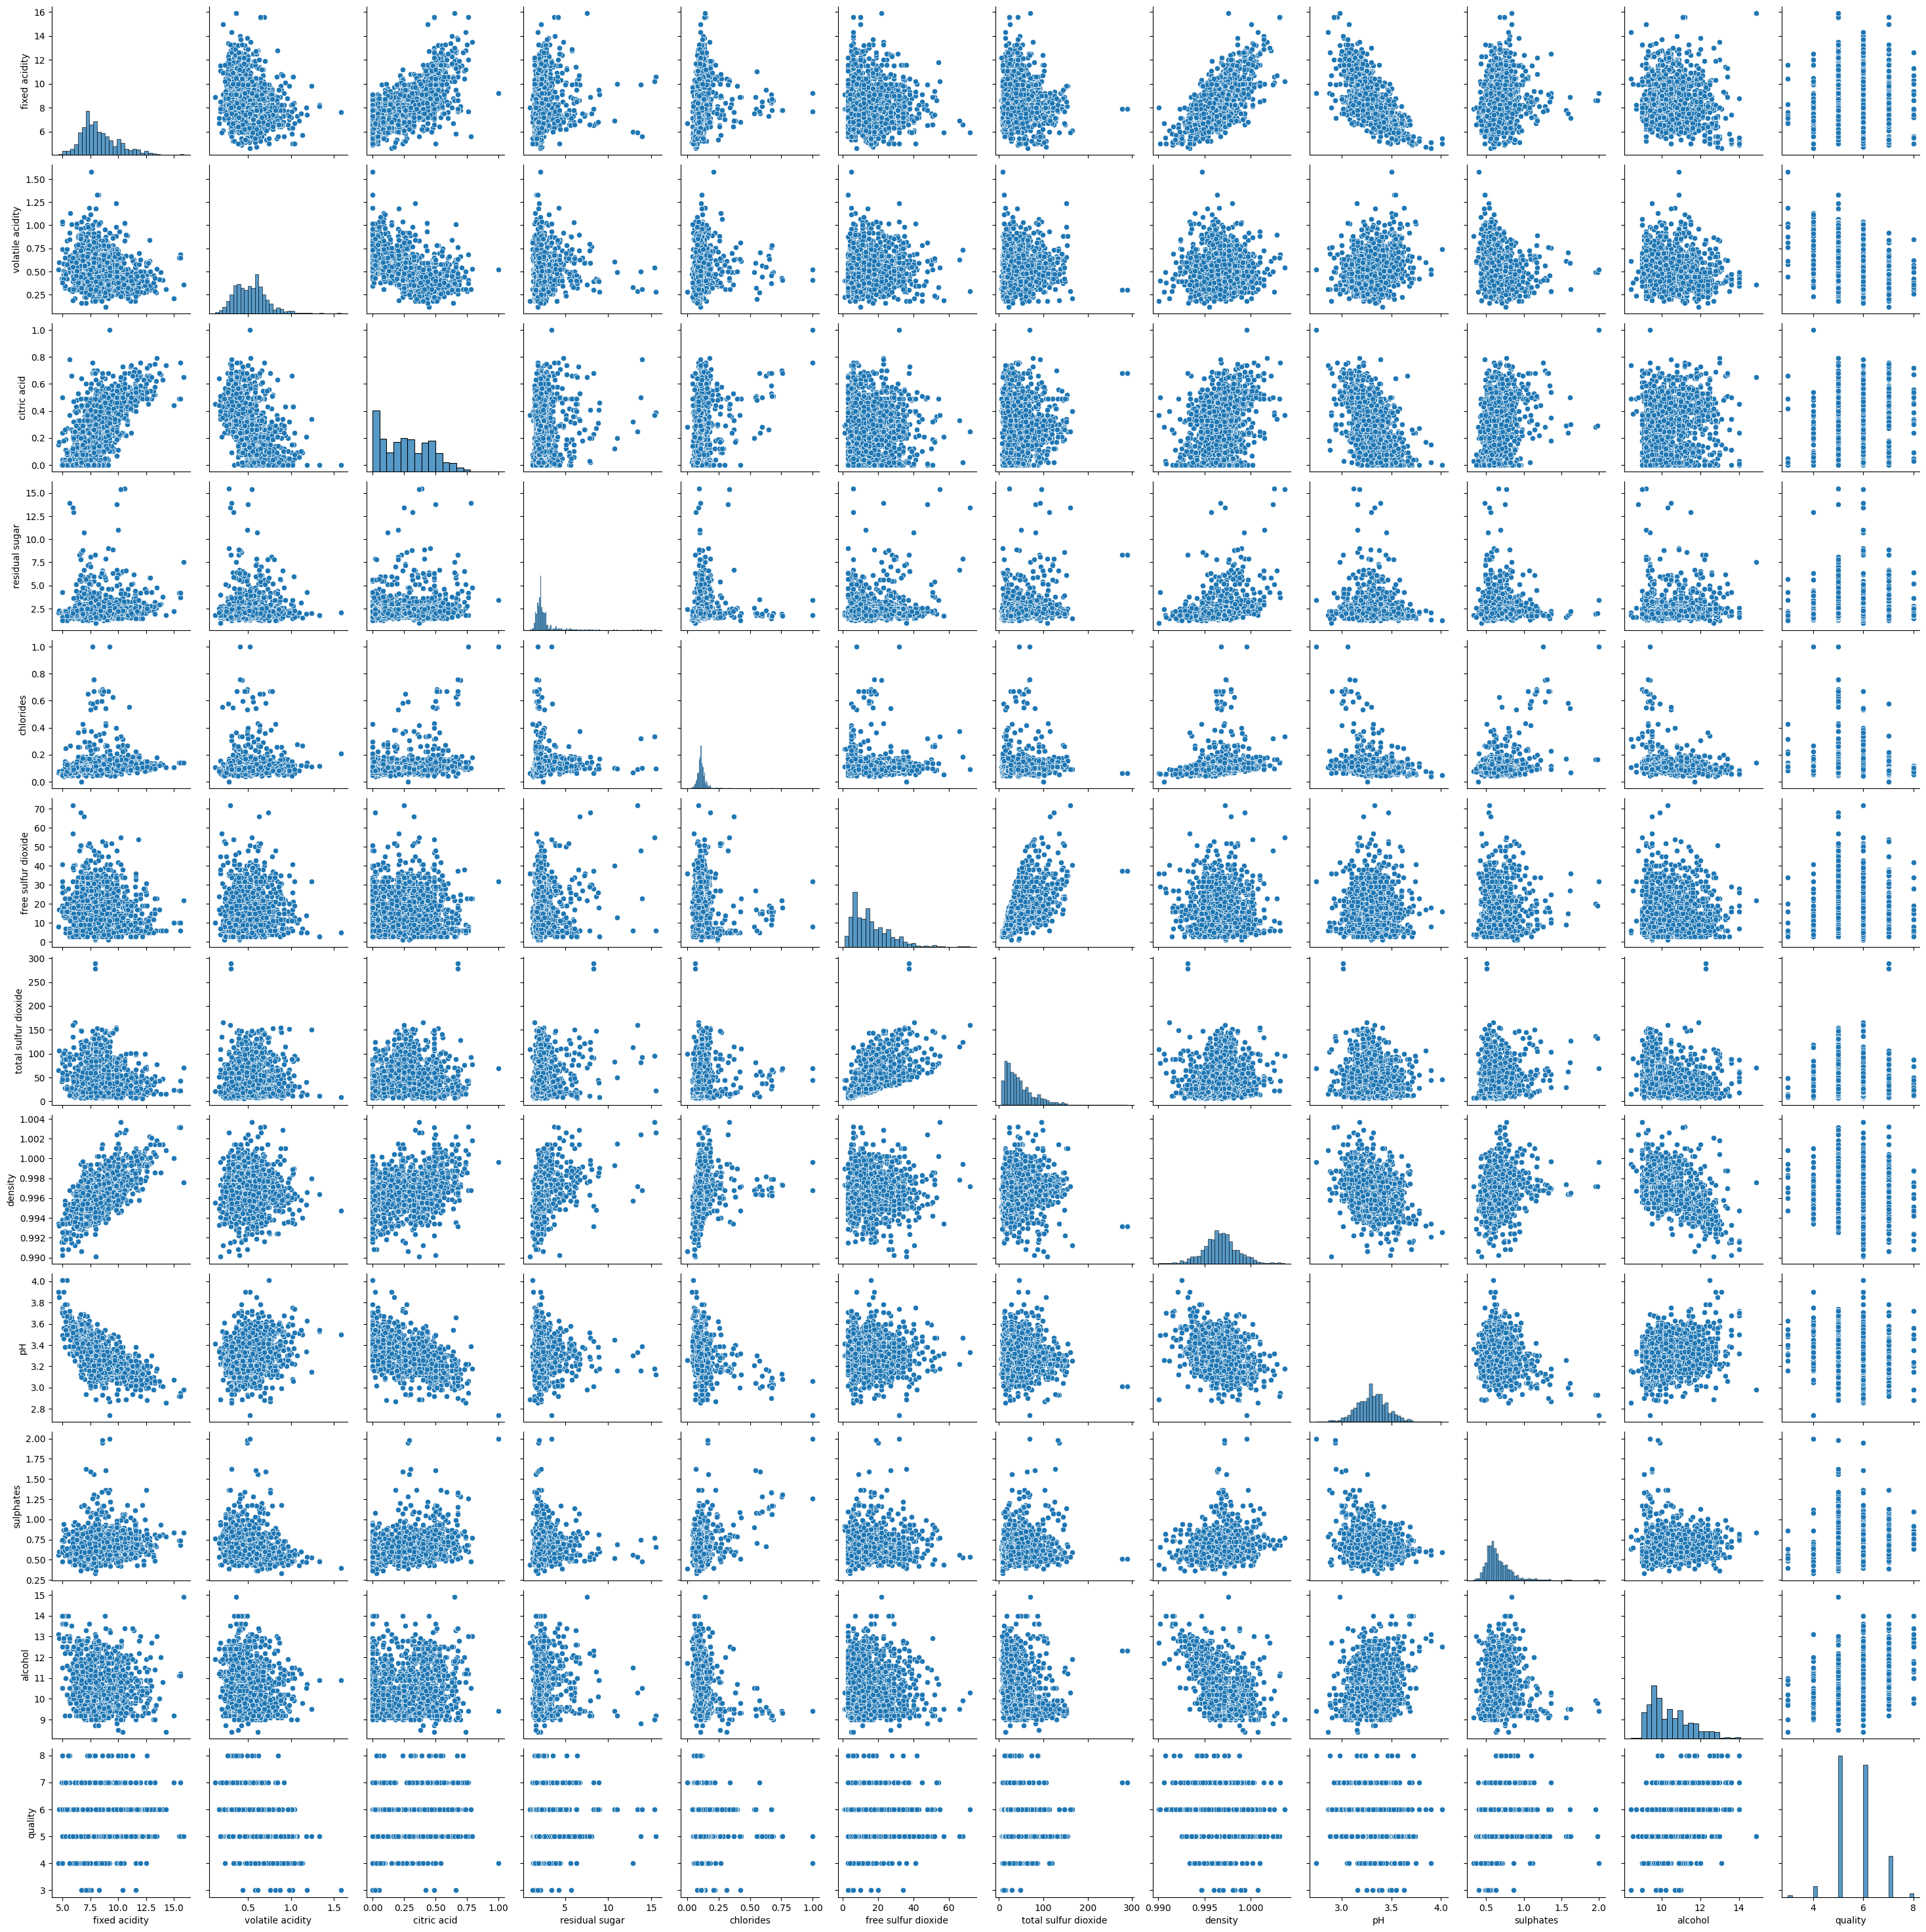

In [117]:
sns.pairplot(df)

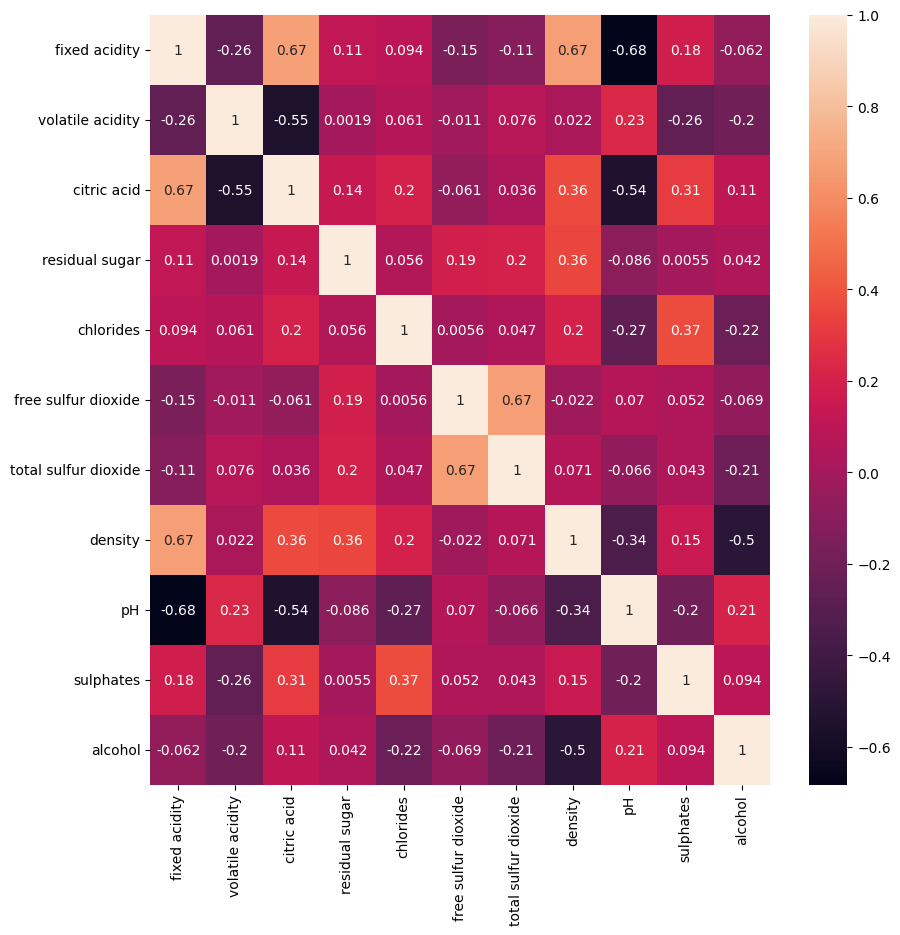

In [118]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(figsize=(10, 10))

# Create a correlation matrix
corr = x.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True)

# Show the figure
plt.show()
